In [1]:
import logging
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image

from src.imageprocessing.baseImageBuilder import BaseImageLoader, PathExtractor
from src.imageprocessing.imageValue import ImageValue
from src.imageprocessing.imageSuperimposer import ImageNormalizer, ImageSuperimposer

from typing import List

logging.basicConfig(level=logging.INFO, format="{line no:%(lineno)d} %(levelname)s - %(message)s")

os.getcwd()

'C:\\Users\\sora4\\PycharmProjects\\datathon2019'

In [2]:
baseLoader = BaseImageLoader("phase-01/data/sentinel-2a-tile-7680x-10240y/timeseries/", "*.png")

In [3]:
all_images: List[ImageValue] = baseLoader.get_images()


{line no:6} INFO - position: 7680-10240, band: B05, date: 2017-06-20, image present: yes


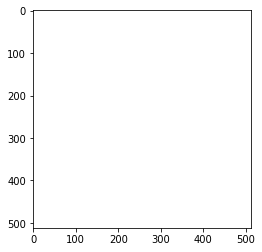

In [4]:
%matplotlib inline

# Test that the ImageValues give me what I intend
first_image: ImageValue = all_images[random.Random().choice(range(0, len(all_images)))]
logging.info(str(first_image))

# Display the image
plt.imshow(np.asarray(first_image.get_image()))

In [5]:
bands = []
for image_value in all_images:
    if image_value.band not in bands:
        bands.append(image_value.band)
print(f"Bands: {bands}")        

# Need to look for a coloured image and check it is displaying as needed.
tci_images = [image for image in all_images if image.band.lower() == "tci"]
print(f"The number of precolored images in the set are: {len(tci_images)}")

Bands: ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'B8A', 'TCI']
The number of precolored images in the set are: 71


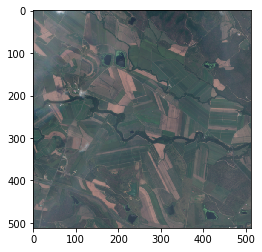

In [6]:
plt.imshow(tci_images[0].image)


## Actual analysis
Now that I have seen that my baseImageBuilder can load in the image files directly, I need to start analysing the
bands I have available to myself. I will attempt to create a heatmap that can be used to analyse how things change along
the image.

<a href="https://stackoverflow.com/questions/42481203/heatmap-on-top-of-image">
https://stackoverflow.com/questions/42481203/heatmap-on-top-of-image</a>

This link shows that the images can have the colormap superimposed on the image by using 
``` python
 def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap


#Use base cmap to create transparent
mycmap = transparent_cmap(plt.cm.Reds)


# Import image and get x and y extents
I = Image.open('./deerback.jpg')
p = np.asarray(I).astype('float')
w, h = I.size
y, x = np.mgrid[0:h, 0:w]

#Plot image and overlay colormap
fig, ax = plt.subplots(1, 1)
ax.imshow(I)
Gauss = twoD_Gaussian((x, y), .5*x.max(), .4*y.max(), .1*x.max(), .1*y.max())
cb = ax.contourf(x, y, Gauss.reshape(x.shape[0], y.shape[1]), 15, cmap=mycmap)
plt.colorbar(cb)
plt.show()
```



In [7]:
def band_heatmaps(band_to_display) -> np.ndarray:
    tci_image:ImageValue
    for tci_image in filter(lambda image_val: image_val.band.lower() == "tci", all_images):
        super_imposer = ImageSuperimposer(tci_image.image)
        for heat_map in filter(lambda image_val: image_val.band.lower() != "tci" 
                                                 and image_val.date == tci_image.date 
                                                 and image_val.band.lower() == band_to_display.lower(), 
                               all_images):
            print(f"\t{heat_map.band}")
            imposed_image:np.ndarray = super_imposer.superimpose(heat_map.image)
            yield imposed_image
    

def show_band_heatmap(band_to_display: str):
    for imposed_image in band_heatmaps(band_to_display):
        fig = plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(imposed_image, cv2.COLOR_BGR2RGB))
        
def single_band_of_images(band_to_find:str) -> List[ImageValue]:
    return list(filter(lambda image_val: image_val.band == band_to_find, all_images))

In [8]:
bands = {image.band for image in all_images if image.band != 'TCI'}
normalized_band = {}

for band in bands:
    print(band)
    normalizer = ImageNormalizer(single_band_of_images(band))
    normalized_images = normalizer.normalize()
    

max values in the images: 255
max values in the images: 255
max values in the images: 255
max values in the images: 255
max values in the images: 255
max values in the images: 255
max values in the images: 255
max values in the images: 255
max values in the images: 255
max values in the images: 255
max values in the images: 255
max values in the images: 255
max values in the images: 255
